In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_df.shape

(5000, 14)

# Observation
There are no null values in this data set

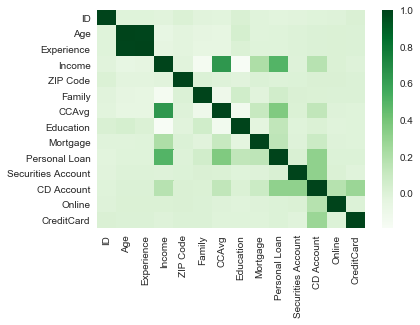

In [5]:
sns.heatmap(bank_df.corr(),cmap='Greens',annot=False) 


# Observation
It representing the data in a 2-dimensional form of general view by numerical data. It seems every column has zeros and ones

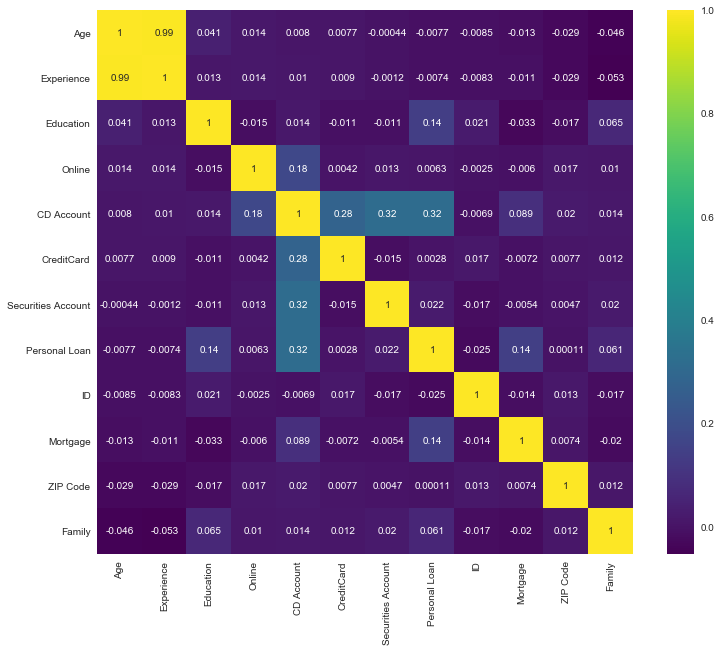

In [6]:
k = 12
cols = bank_df.corr().nlargest(k, 'Age')['Age'].index
cm = bank_df[cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Lets define X for our dataset

In [7]:
X = np.asarray(bank_df[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg']])
X[0:5]

array([[1.0000e+00, 2.5000e+01, 1.0000e+00, 4.9000e+01, 9.1107e+04,
        4.0000e+00, 1.6000e+00],
       [2.0000e+00, 4.5000e+01, 1.9000e+01, 3.4000e+01, 9.0089e+04,
        3.0000e+00, 1.5000e+00],
       [3.0000e+00, 3.9000e+01, 1.5000e+01, 1.1000e+01, 9.4720e+04,
        1.0000e+00, 1.0000e+00],
       [4.0000e+00, 3.5000e+01, 9.0000e+00, 1.0000e+02, 9.4112e+04,
        1.0000e+00, 2.7000e+00],
       [5.0000e+00, 3.5000e+01, 8.0000e+00, 4.5000e+01, 9.1330e+04,
        4.0000e+00, 1.0000e+00]])

Lets define Y for our dataset

In [8]:
y = np.asarray(bank_df['CreditCard'])
y [0:5]

array([0, 0, 0, 0, 1], dtype=int64)

Split our dataset into train and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4000, 7) (4000,)
Test set: (1000, 7) (1000,)


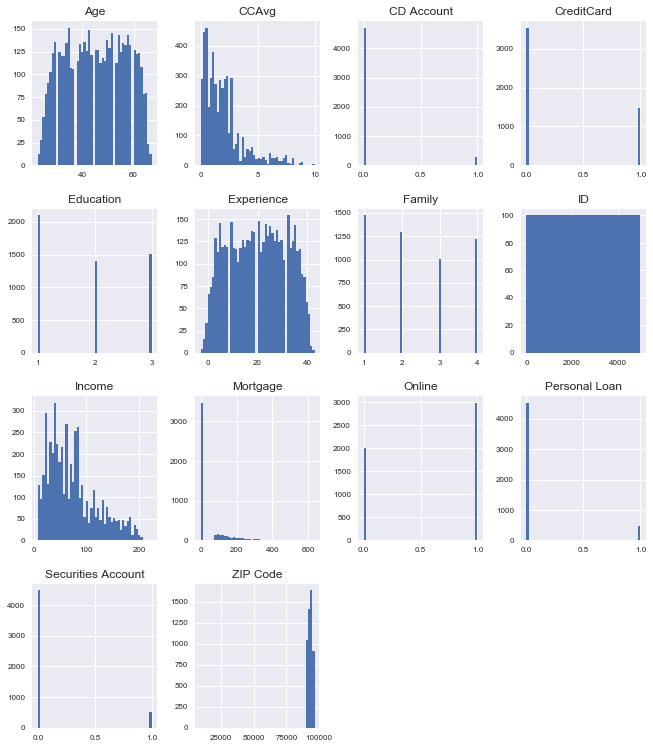

In [10]:
list(set(bank_df.dtypes.tolist()))

eda_num = bank_df.select_dtypes(include = ['float64', 'int64'])
eda_num.head()
eda_num.hist(figsize=(11, 13), bins=50, xlabelsize=8, ylabelsize=8); 

# Observation
In the above histogram, primarily we have age, credit card and income and it having the probablity of buying loan or not by customers

# Model using LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Observation
In this model Linear and Logisitc Regression are include in package called sklearn, discrete and continuous outcome are use to predict whether the customer buying loan or not

In [12]:
# Predict using our test set
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Observation
All elements of the array is same numeric type 0.

In [52]:
# Predict using our test set
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.71, 0.29],
       [0.7 , 0.3 ],
       [0.72, 0.28],
       ...,
       [0.7 , 0.3 ],
       [0.71, 0.29],
       [0.7 , 0.3 ]])

# Observation
Array instead of the dtype an arrange with natural numbers

In [14]:
# Looking at accuracy of classifier is to look at confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  0 302]
 [  0 698]]


# Observation
Normalize Confusion Matrix the column is credit card, so that it contains only numbers between 0 and 1. Normalize a matrix (row and column normalization)

Confusion matrix, without normalization
[[  0 302]
 [  0 698]]


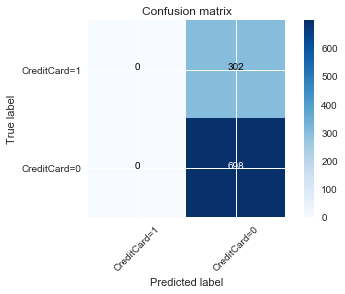

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['CreditCard=1','CreditCard=0'],normalize= False,  title='Confusion matrix')

In [16]:
#Based on the count of each section, we can calculate precision and recall 
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.70      1.00      0.82       698
          1       0.00      0.00      0.00       302

avg / total       0.49      0.70      0.57      1000



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Observation
Accuracy of f1-score is 0.70 count of the calculation.

In [17]:
#predicted output is a probability value between 0 and 1.
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6126226599595458

# Conclusion - Logistic Regression:

In Logistic regression, the output can be the probability of customers buying Loan is yes (or equals to 1). This probability is a value between 0 and 1. The Predicted result is 61%.

# K-NEAREST NEIGHBOUR MODEL

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [20]:
#data is sliced in order to study fast
data = data_df.loc [1:1000,'ID':'CreditCard'] 

In [21]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


In [22]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,501.500000,45.614000,20.370000,73.573000,93065.63900,2.461000,2.054910,1.859000,54.635000,0.096000,0.107000,0.065000,0.601000,0.287000
std,288.819436,11.583315,11.595843,45.192555,3145.85135,1.160959,1.808093,0.834155,99.260952,0.294739,0.309268,0.246649,0.489938,0.452588
min,2.000000,23.000000,-2.000000,8.000000,9307.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,251.750000,35.000000,10.000000,39.000000,92028.00000,1.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,501.500000,46.000000,21.000000,64.000000,93117.00000,2.000000,1.700000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,751.250000,55.000000,30.000000,98.000000,94596.00000,4.000000,2.600000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1001.000000,67.000000,42.000000,205.000000,96651.00000,4.000000,10.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Observation
Standard deviation is consistency level, where cd account has a better consistency comparing with other columns. 

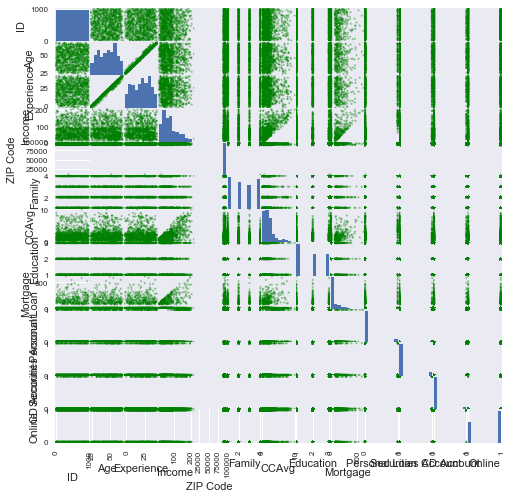

In [23]:
color_list = ['red' if i=='0' else 'green' for i in data.loc[:,'CreditCard']]
pd.plotting.scatter_matrix(data.loc[:,data.columns != 'CreditCard'],c = color_list,figsize = [8,8], diagonal = 'hist', alpha = 0.5,  s = 10, marker = '*')
plt.show()

# Observation
Histogram and scatter plots increases readability because there is considerable overlap know as overplotting.

0    713
1    287
Name: CreditCard, dtype: int64

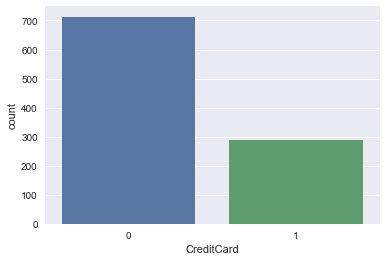

In [24]:
sns.countplot(x='CreditCard', data=data)
data.loc[:,'CreditCard'].value_counts()

# Observaion
value counts for credit card number of 0 and 1.

In [25]:
data_knn = data_df[['Age','CreditCard', 'Income']]
data_knn.head()

,Age,CreditCard,Income
0,25,0,49
1,45,0,34
2,39,0,11
3,35,0,100
4,35,1,45


# Observation
Here as age increases income decreases thus dataset has inverse relationship.

In [26]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
Age           5000 non-null int64
CreditCard    5000 non-null int64
Income        5000 non-null int64
dtypes: int64(3)
memory usage: 117.3 KB


# K-Nearest Neighbour Algorithm

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data_knn.loc[:,data_knn.columns != 'CreditCard'], data_knn.loc[:,'CreditCard']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

# Observation
I took credit card column to size of 0.3, train and test datasets are predict in knn

In [28]:
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

#Best K value selection
neig = np.arange(1,300)
train_accuracy = []
test_accuracy = []  
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.6306666666666667


# Observation
Make point predictions on the test set using the fit model with KNN k=3

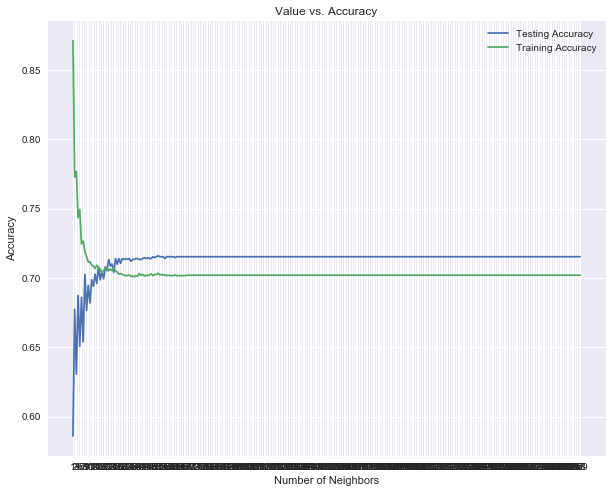

In [29]:
# Plot
plt.figure(figsize=(10,8))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()

# Observation
Number of neighbours in train and test data accuracy. 70 to 72

In [30]:
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best Accuracy is 0.716 with K = 51


# Conclusion:
As a result, we can say that using KNN algorithm with K=51, we can estimate the "CreditCard" of a person from 0/1 "Income" value and "Age" type with 71% accuracy.

# NAIVE-BAYES-MODEL

In [31]:
import numpy as np
import pandas as pd

In [32]:
train = pd.read_csv ("train.csv")
test = pd.read_csv ("test.csv")

In [33]:
list(train)

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [34]:
train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1001,59,35,8,92691,4,0.7,1,91,0,1,0,0,0
1,1002,57,32,55,90717,4,2.1,1,108,0,0,0,1,0
2,1003,46,20,85,95617,2,0.4,3,0,0,0,0,0,0
3,1004,25,1,62,94720,4,0.0,1,229,0,0,0,1,0
4,1005,53,23,65,95054,4,2.0,3,0,0,0,0,1,0
5,1006,38,12,138,95112,2,0.0,1,0,0,1,0,1,0
6,1007,63,38,103,91103,1,2.5,1,0,0,0,0,1,0
7,1008,44,19,99,95064,3,3.5,3,357,1,0,0,0,0
8,1009,50,24,152,92220,1,7.3,1,0,0,0,0,1,0
9,1010,28,3,25,91330,2,0.9,3,140,0,0,0,1,0


In [35]:
train.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage               object
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [36]:
train.describe

<bound method NDFrame.describe of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0     1001   59          35       8     92691       4   0.70          1   
1     1002   57          32      55     90717       4   2.10          1   
2     1003   46          20      85     95617       2   0.40          3   
3     1004   25           1      62     94720       4   0.00          1   
4     1005   53          23      65     95054       4   2.00          3   
5     1006   38          12     138     95112       2   0.00          1   
6     1007   63          38     103     91103       1   2.50          1   
7     1008   44          19      99     95064       3   3.50          3   
8     1009   50          24     152     92220       1   7.30          1   
9     1010   28           3      25     91330       2   0.90          3   
10    1011   27           3      98     95616       2   2.50          1   
11    1012   52          27      39     94304       2   0.70      

In [37]:
#DATA CLEANING AND PREPROCESSING
#Find missing values

train.isnull().sum()
test.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Observation
In this dataset has no null values

In [38]:
#Impute missing values with mean (numerical variables)
train.fillna(train.mean(),inplace=True) 
train.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [39]:
#Test data
test.fillna(test.mean(),inplace=True) 
test.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [40]:
#Impute missing values with mode (categorical variables)
train.Experience.fillna(train.Experience.mode()[0],inplace=True)
train.Family.fillna(train.Family.mode()[0],inplace=True)
train.CreditCard.fillna(train.CreditCard.mode()[0],inplace=True) 
train.Online.fillna(train.Online.mode()[0],inplace=True)  
train.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [41]:
# Test data
test.Experience.fillna(test.Experience.mode()[0],inplace=True)
test.Family.fillna(test.Family.mode()[0],inplace=True) 
test.CreditCard.fillna(test.CreditCard.mode()[0],inplace=True)  
test.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [42]:
#Treatment of outliers
train.Age=np.log(train.Age)

# Observation
checking the number of outliers in the column age, log of numpy values can be determined.

In [43]:
#PREDICTIVE MODELLING
#Remove Age variable - Irrelevant
train=train.drop('Age',axis=1)
test=test.drop('Age',axis=1)

In [44]:
#Create target variable
X=train.drop('Income',1)
y=train.Income

# Observation
In this dependent variable of income has train and test dataset are target variables. 

In [45]:
#Build dummy variables for categorical variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [46]:
#Split train data for cross validation
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.5)

In [47]:
#Split train data for cross validation
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.6)

In [48]:
#NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [49]:
#Predict values for cv data
pred_cv4=nb.predict(x_cv)

In [50]:
#Evaluate accuracy of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_cv, pred_cv4, normalize = True)

0.009166666666666667

# Conclusion

The Naive Bayes algorithm for classifying dataset is less accurate on this numerical data. The predicted accuracy is 0.0091%

# Overall Observation

1. There is no null values in this data set.

2. It representing the data in a 2-dimensional form of general view by numerical data. It seems every column has zeros and ones.

3. In these sns has Experience column is 0.99%, which means this dataset has every customer have experience.

4. In this histogram, primarily we have age, credit card and income to find the probablity of buying a loan or not by customers.

5. All elements of the array is same numeric type 0.

6. Array instead of the dtype an arrange with natural numbers.

7. Normalize Confusion Matrix the column is credit card, so that it contains only numbers between 0 and 1. Normalize a matrix (row and column normalization).

8. In this model Linear and Logisitc Regression are include in package called sklearn, discrete and continuous outcome are use to predict whether the customer buying loan or not.

9. Accuracy of f1-score is 0.70 count of the calculation.

10. Standard deviation is the consistency level, where cd account has a better consistency comparing with other columns. 

11. Scatter plots increases readability because there is considerable overlap know as overplotting.

12. Value counts for credit card number is 0 and 1.

13. While income increases as age,experience will high. But, here as age increases income decreases thus dataset has inverse relationship.

14. I took credit card column to size of 0.3, train and test datasets are predicted in knn.

15. Make point predictions on the test set using the fit model with KNN k=3.

16. Number of neighbours in train and test data accuracy is 70 to 72.

17. This dataset has no null values.

18. Checking the number of outliers in the column age, log of numpy values can be determined.

19. In this dependent variable of income has train and test dataset are target variables. 

# Overall Conclusion

From the above three models, KNN has good accuracy to find Customers buying the loan. 
